In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
!pip install mailbox

  Created wheel for mailbox: filename=mailbox-0.4-cp37-none-any.whl size=4686 sha256=ea6254f5073126d6a455a1d1a28d6fedea1d024bfd427c0e01732fec1cd7fe0b
  Stored in directory: /Users/joinalahmed/Library/Caches/pip/wheels/d7/3a/b3/2a89dce746b409b591bf7e61ee1696f00efe2cadd588496a85
Successfully built mailbox


In [3]:
import mailbox
mboxfile = "data.mbox"

mbox = mailbox.mbox(mboxfile)
mbox

In [4]:
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
From
Message-ID
Subject
MIME-Version
Content-Type
To
Date
X-LinkedIn-Class
X-LinkedIn-Template
X-LinkedIn-fbl
X-LinkedIn-Id
Feedback-ID
Require-Recipient-Valid-Since


In [5]:
import csv

with open('mailbox.csv', 'w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    for message in mbox:
        writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [6]:
dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [7]:
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [8]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

/Users/joinalahmed/opt/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/joinalahmed/opt/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/joinalahmed/opt/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/joinalahm

In [9]:
dfs = dfs[dfs['date'].notna()]

In [10]:
dfs.to_csv('gmail.csv')

In [11]:
dfs.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17283 entries, 1 to 17477
Data columns (total 6 columns):
subject    17071 non-null object
from       17283 non-null object
date       17283 non-null datetime64[ns, UTC]
to         17163 non-null object
label      17281 non-null object
thread     17283 non-null object
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 945.2+ KB


In [12]:
dfs.head(10)

,subject,from,date,to,label,thread
1,Joinal: 1 new job for 'data scientist' in Jaka...,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,2020-05-26 20:48:55+00:00,Joinal Ahmed <joinalahmed@gmail.com>,"Bin,Category Updates,Unread",1667787536921813032
2,=?utf-8?B?W0ZyZWUgVmlydHVhbCBFdmVudF0gTW9uZ29E...,"""MongoDB.live 2020"" <mongodbteam@mongodb.com>",2020-05-27 04:36:07+00:00,joinalahmed@gmail.com,"Important,Bin,Opened,Category Promotions",1667816930628387143
3,Avail your Free SAS eLearning Subscription today,SAS India <newsletters@analyticsindiamag.com>,2020-05-27 06:19:38+00:00,joinalahmed@gmail.com,"Bin,Category Promotions,Unread",1667823857620680141
4,"=?utf-8?Q?Joy,_spend_on_experiences_not_things...",Netflix <info@mailer.netflix.com>,2020-05-27 03:54:03+00:00,joinalahmed@gmail.com,"Bin,Category Promotions,Unread",1667814281105483691
5,New videos from Last moment tuitions,YouTube <noreply@youtube.com>,2020-05-27 01:30:54+00:00,JOINAL AHMED <joinalahmed@gmail.com>,"Bin,Opened,Category Social",1667805274027596988
6,"Joinal, please add me to your LinkedIn network",RANJITH RAJENDRAN R <invitations@linkedin.com>,2020-05-27 06:31:42+00:00,Joinal Ahmed <joinalahmed@gmail.com>,"Bin,Category Social,Unread",1667732630073345432
7,"Joinal, please add me to your LinkedIn network",Venkat Nagaram <invitations@linkedin.com>,2020-05-26 19:54:12+00:00,Joinal Ahmed <joinalahmed@gmail.com>,"Bin,Category Social,Unread",1667732630073345432
8,"Joinal, please add me to your LinkedIn network",Mayur Dhameliya <invitations@linkedin.com>,2020-05-26 09:11:23+00:00,Joinal Ahmed <joinalahmed@gmail.com>,"Bin,Category Social,Unread",1667732630073345432
9,"Joinal, please add me to your LinkedIn network",Rupakanth Gundralla <invitations@linkedin.com>,2020-05-26 06:16:14+00:00,Joinal Ahmed <joinalahmed@gmail.com>,"Bin,Category Social,Unread",1667732630073345432
10,"Edureka Masterclass list: ""Reminder! Webinar O...","""Edureka! (Meetup)"" <meetup-group-DPfwLAVR-ann...",2020-05-26 12:58:42+00:00,meetup-group-DPfwLAVR-announce@meetup.com,"Bin,Category Forums,Unread",1667757950949060307


In [13]:
dfs.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [14]:
import re

def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan

In [15]:
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [16]:
myemail = 'invitations@linkedin.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [17]:
dfs.drop(columns='to', inplace=True)

In [18]:
dfs.head(10)

,subject,from,date,label,thread
1,Joinal: 1 new job for 'data scientist' in Jaka...,jobalerts-noreply@linkedin.com,2020-05-26 20:48:55+00:00,inbox,1667787536921813032
2,=?utf-8?B?W0ZyZWUgVmlydHVhbCBFdmVudF0gTW9uZ29E...,mongodbteam@mongodb.com,2020-05-27 04:36:07+00:00,inbox,1667816930628387143
3,Avail your Free SAS eLearning Subscription today,newsletters@analyticsindiamag.com,2020-05-27 06:19:38+00:00,inbox,1667823857620680141
4,"=?utf-8?Q?Joy,_spend_on_experiences_not_things...",info@mailer.netflix.com,2020-05-27 03:54:03+00:00,inbox,1667814281105483691
5,New videos from Last moment tuitions,noreply@youtube.com,2020-05-27 01:30:54+00:00,inbox,1667805274027596988
6,"Joinal, please add me to your LinkedIn network",invitations@linkedin.com,2020-05-27 06:31:42+00:00,sent,1667732630073345432
7,"Joinal, please add me to your LinkedIn network",invitations@linkedin.com,2020-05-26 19:54:12+00:00,sent,1667732630073345432
8,"Joinal, please add me to your LinkedIn network",invitations@linkedin.com,2020-05-26 09:11:23+00:00,sent,1667732630073345432
9,"Joinal, please add me to your LinkedIn network",invitations@linkedin.com,2020-05-26 06:16:14+00:00,sent,1667732630073345432
10,"Edureka Masterclass list: ""Reminder! Webinar O...",meetup-group-DPfwLAVR-announce@meetup.com,2020-05-26 12:58:42+00:00,inbox,1667757950949060307


In [19]:
import datetime 
import pytz

def refactor_timezone(x):
  est = pytz.timezone('US/Eastern')
  return x.astimezone(est)

In [20]:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [21]:
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.weekday_name)
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [22]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [23]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [24]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [25]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [26]:
dfs.index = dfs['date']
del dfs['date']

In [27]:
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Sun, 23 Sep 2012 06:13 AM
Wed, 27 May 2020 03:52 AM
inbox    17189
sent        94
Name: label, dtype: int64


In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [29]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('US/Eastern')
    
  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [30]:
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

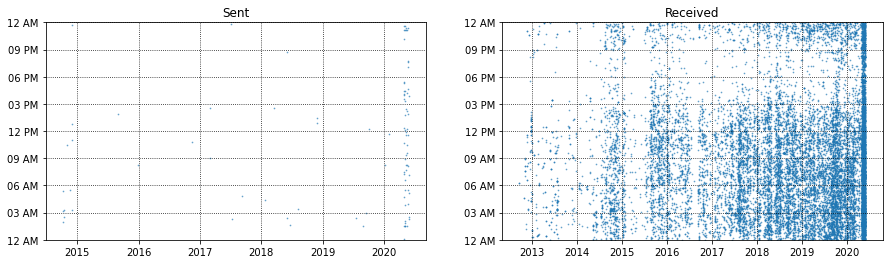

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [32]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [33]:
from scipy import ndimage

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);



In [34]:
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])  
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

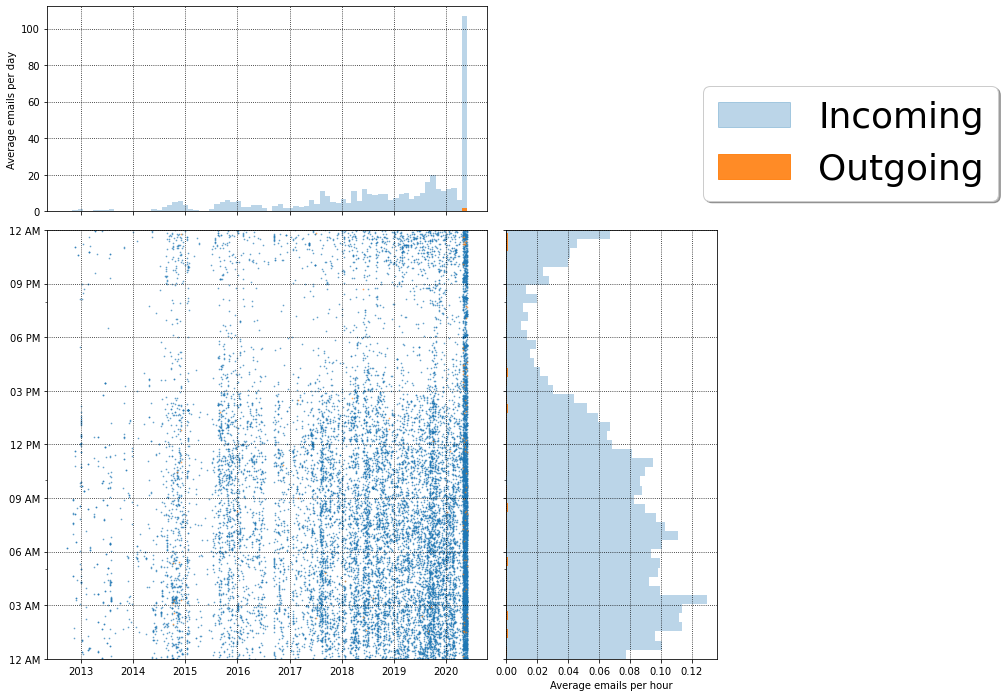

In [46]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.3)
tpl.plot(sent, color='C1', alpha=0.9)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.3)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.9)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=36, shadow=True);

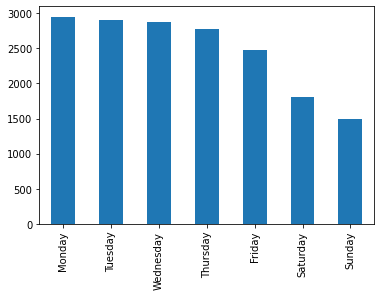

In [47]:
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [49]:
addrs = received['from'].value_counts()

addrs[0:10]

joinalahmed@gmail.com         2141
info@meetup.com                543
info@hirist.com                164
newsletters@shopatbest.com     160
no-reply@nestaway.com          149
newsletters@suprememail.in     131
no-reply@adzuna.in             116
student@internshala.com        115
BankAlerts@kotak.com           113
noreply@youtube.com            110
Name: from, dtype: int64

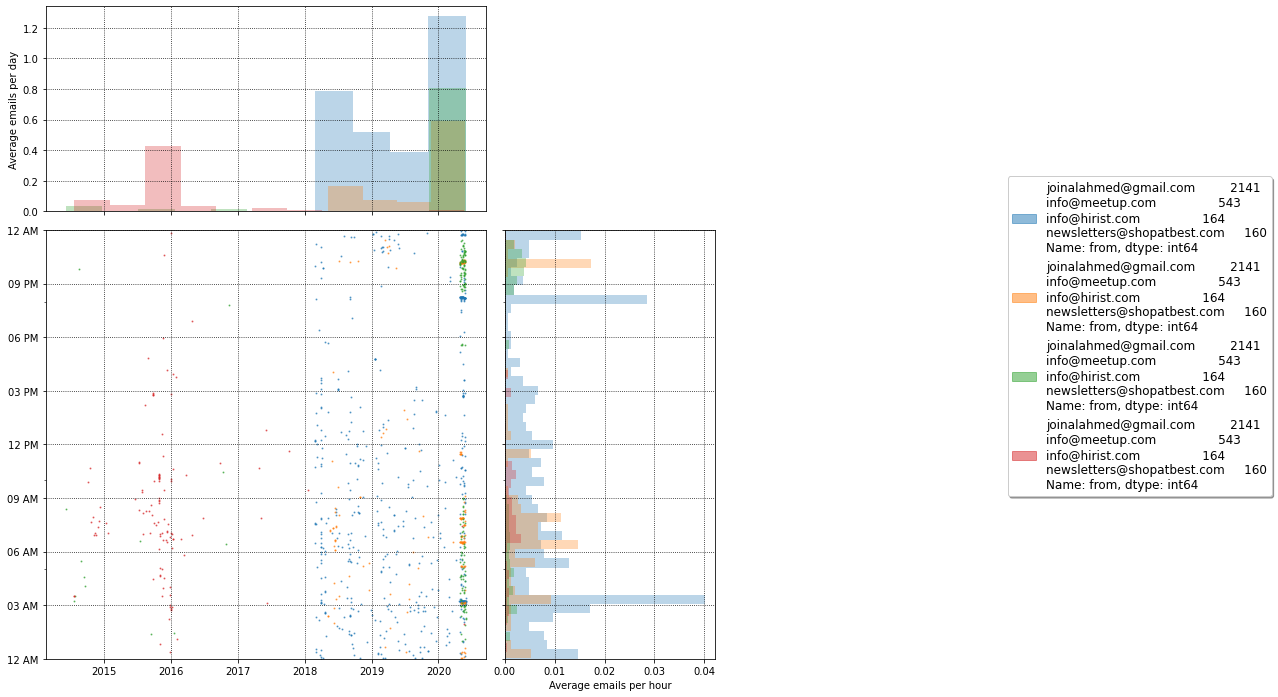

In [60]:
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[2.8, 0.2], fontsize=12, shadow=True);

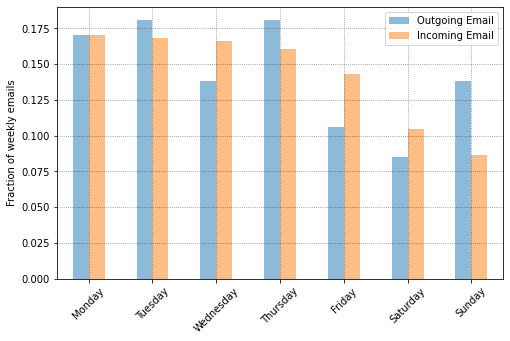

In [51]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

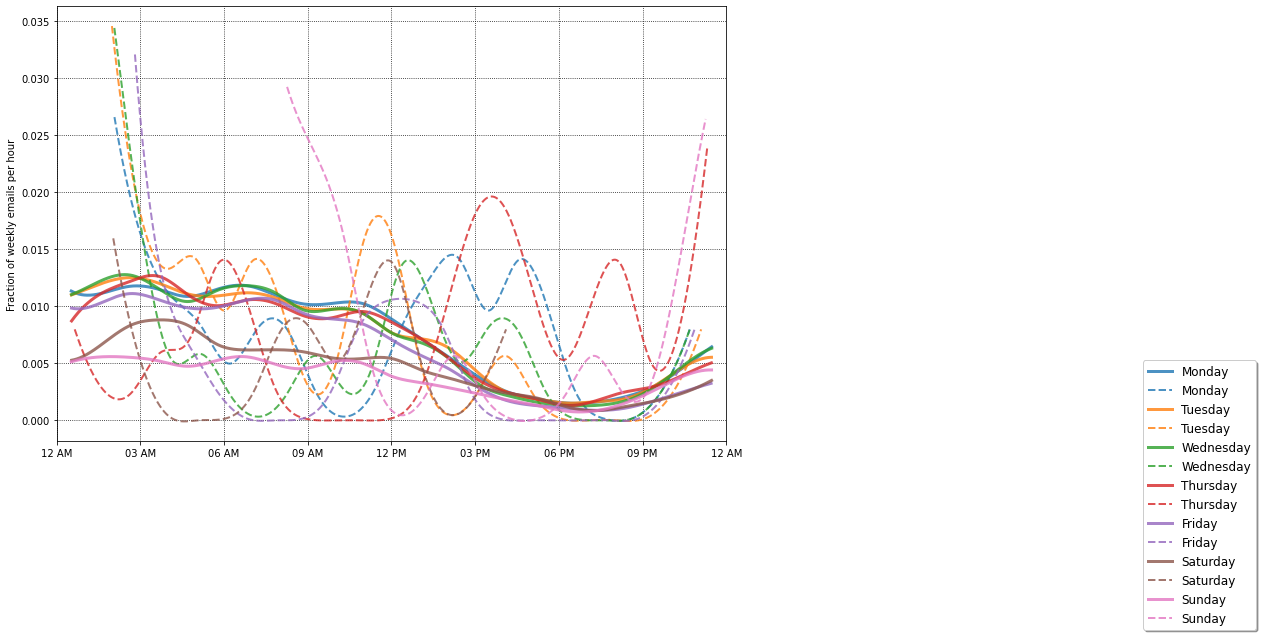

In [64]:
import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(12,8))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(bbox_to_anchor=[1.8, 0.2], fontsize=12, shadow=True)


In [66]:
!pip install WordCloud

     |████████████████████████████████| 163kB 613kB/s eta 0:00:01


In [73]:
from wordcloud import WordCloud 

text = ' '.join(map(str, dfs['subject'].values))

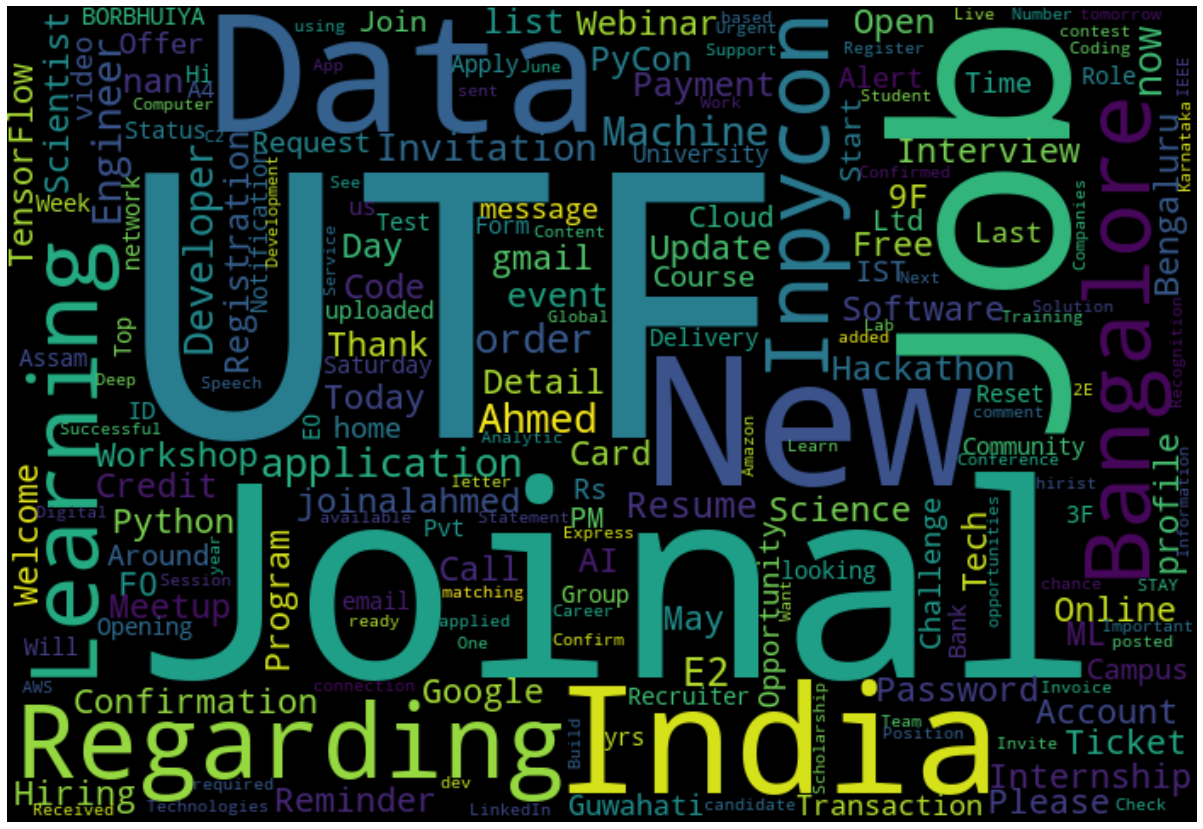

In [74]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)